In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from scipy.stats import multivariate_normal

%matplotlib notebook

In [2]:
X = np.loadtxt('a011_mixdata.txt')
N, D = X.shape

<IPython.core.display.Javascript object>


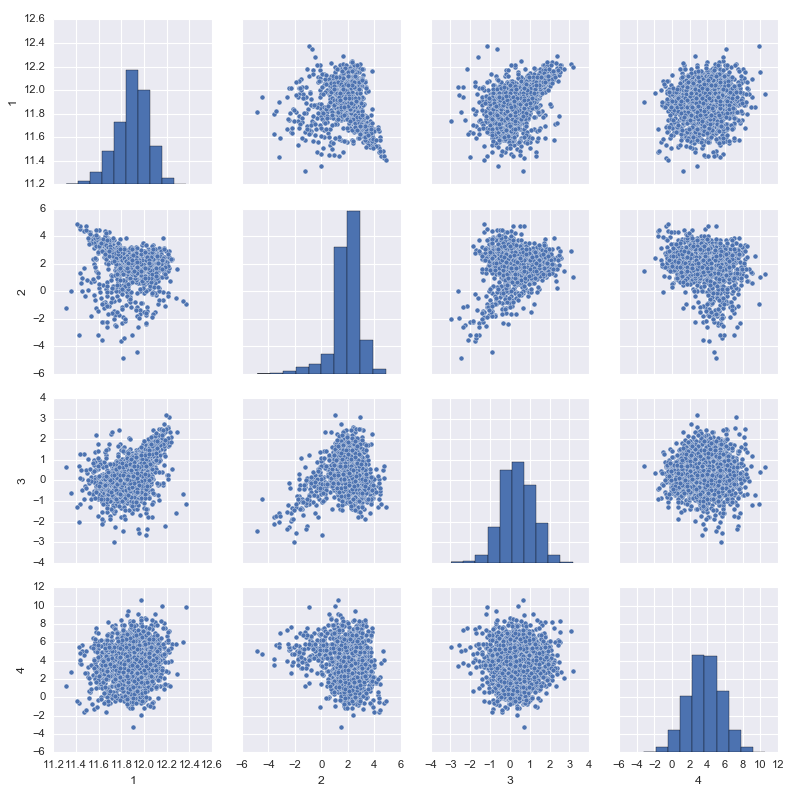

In [3]:
df = pd.DataFrame(X, columns=[1, 2, 3, 4])
sns.pairplot(df)
plt.savefig('EM_expl.png', dpi=300, bbox_layout='tight')
plt.show()

<IPython.core.display.Javascript object>


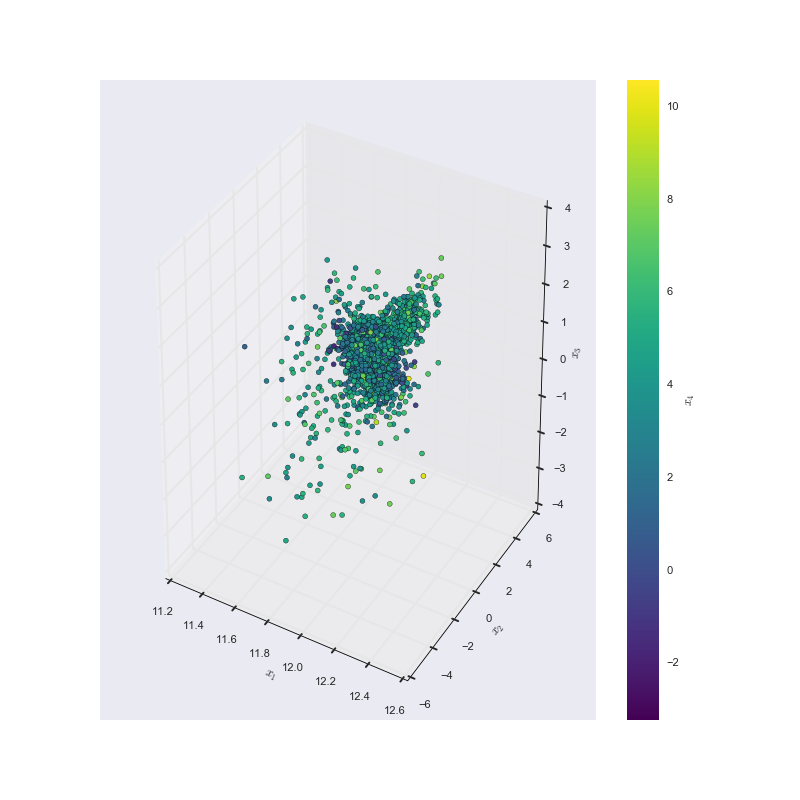

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 3], depthshade=False, cmap=plt.cm.viridis)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.colorbar(sc, label='$x_4$')
plt.show()

<IPython.core.display.Javascript object>


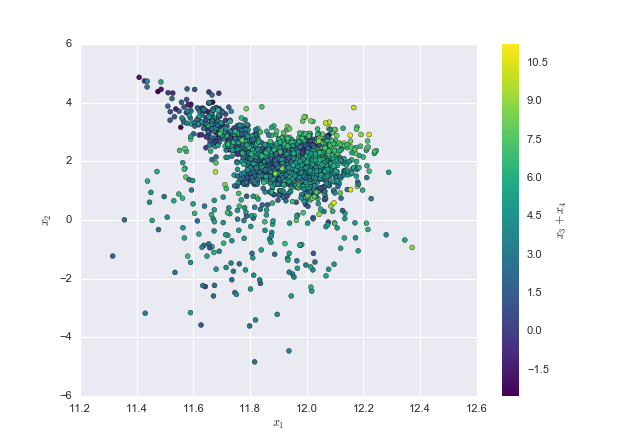

In [15]:
plt.figure()
col = plt.scatter(X[:, 0], X[:, 1], c=X[:, 2]+X[:, 3], cmap=plt.cm.viridis)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar(col, label='$x_3+x_4$')
plt.show()

In [6]:
from numpy.core.umath_tests import matrix_multiply as mm

def EM(X, K=4, max_iter=100, tol=0.01):
    # Initialize variables
    N, D = X.shape
    pis = np.ones(K) / K
    mus = np.random.uniform(-1, 1, size=(4, 4)) + X.mean(axis=0)
    covs = np.ones((K, D, D)) * (4*np.random.rand(D) + 2) * np.eye(4)
    
    prev_llh = 0
    for i in range(max_iter):
        # E step
        resps = np.zeros((K, N)) # responsibilities
        for k in range(K):
            resps[k] = pis[k] * multivariate_normal(mus[k], covs[k]).pdf(X)
        resps /= resps.sum(axis=0)
        
        # M step
        Nks = resps.sum(axis=1)[:, np.newaxis]
        mus = np.dot(resps, X) / Nks # Calculate new mus
        for k in range(K):
            diff = X - mus[k]
            sqdiff = mm(diff[:, :, np.newaxis], diff[:, np.newaxis, :])
            covs[k] = (resps[k, :, np.newaxis, np.newaxis] * sqdiff).sum(axis=0)
        covs /= Nks[:, np.newaxis]
        pis = Nks / N
        
        # Evaluate log likelihood
        llh = 0
        for pi, mu, cov in zip(pis, mus, covs):
            llh += pi*multivariate_normal(mu, cov).pdf(X)
        llh = np.log(llh).sum()
        print('Iteration: %d, likelihood %.4f' % (i, llh))
        
        if np.abs(llh - prev_llh) < tol:
            # Break if the log-likelihood hasn't improved much
            break
        prev_llh = llh
    
    return pis, mus, covs 

In [7]:
K = 4
pis, mus, covs = EM(X, K=K)

Iteration: 0, likelihood -7997.4809
Iteration: 1, likelihood -7735.4625
Iteration: 2, likelihood -7381.7738
Iteration: 3, likelihood -7108.5512
Iteration: 4, likelihood -6885.6609
Iteration: 5, likelihood -6700.0639
Iteration: 6, likelihood -6595.0326
Iteration: 7, likelihood -6551.3182
Iteration: 8, likelihood -6526.9510
Iteration: 9, likelihood -6498.8849
Iteration: 10, likelihood -6455.5421
Iteration: 11, likelihood -6407.7765
Iteration: 12, likelihood -6362.5299
Iteration: 13, likelihood -6314.5875
Iteration: 14, likelihood -6258.1683
Iteration: 15, likelihood -6189.3236
Iteration: 16, likelihood -6111.8097
Iteration: 17, likelihood -6048.3610
Iteration: 18, likelihood -6011.4032
Iteration: 19, likelihood -5996.8515
Iteration: 20, likelihood -5992.2286
Iteration: 21, likelihood -5990.6740
Iteration: 22, likelihood -5990.1107
Iteration: 23, likelihood -5989.8970
Iteration: 24, likelihood -5989.8129
Iteration: 25, likelihood -5989.7785
Iteration: 26, likelihood -5989.7640
Iteration: 

In [40]:
def plot_components(X, mus, covs, pis):
    N, K = X.shape[0], mus.shape[0]
    print(K)
    # Evaluate the model
    probs = np.zeros((K, N))
    for k in range(K):
        probs[k] = pis[k] * multivariate_normal(mus[k], covs[k]).pdf(X)
    prediction = np.argmax(probs, axis=0)
    
    plt.figure()
    colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
    for k, color in zip(range(K), colors):
        plt.scatter(X[prediction==k, 0], X[prediction==k, 1], c=color, label='C=%d'%k)

    plt.legend()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.savefig('EM.png', dpi=300, bbox_layout='tight')
    plt.show()

<IPython.core.display.Javascript object>


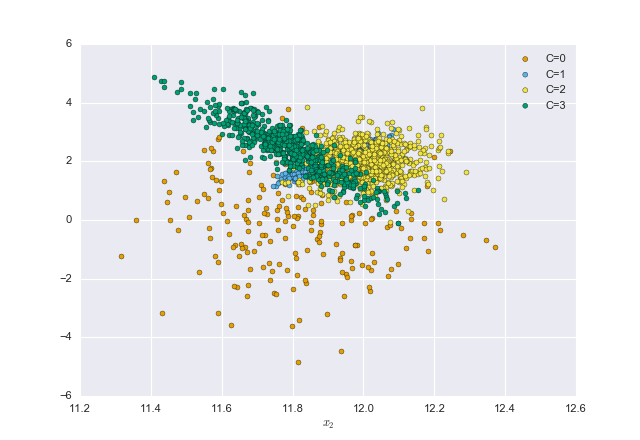

In [9]:
plot_components(X, mus, covs, pis)

In [48]:
def show_corrs(covs):
    for k in range(len(covs)):
        corr = covs[k, 0, 1] / np.sqrt(covs[k, 0, 0] * covs[k, 1, 1])
        print('correlation component %d: %.2f' % (k, corr))

Iteration: 0, likelihood -7876.9435
Iteration: 1, likelihood -7532.1500
Iteration: 2, likelihood -7272.6553
Iteration: 3, likelihood -7153.9945
Iteration: 4, likelihood -7106.5972
Iteration: 5, likelihood -7084.4173
Iteration: 6, likelihood -7072.5415
Iteration: 7, likelihood -7065.9297
Iteration: 8, likelihood -7062.2787
Iteration: 9, likelihood -7060.3187
Iteration: 10, likelihood -7059.2924
Iteration: 11, likelihood -7058.7608
Iteration: 12, likelihood -7058.4848
Iteration: 13, likelihood -7058.3394
Iteration: 14, likelihood -7058.2607
Iteration: 15, likelihood -7058.2166
Iteration: 16, likelihood -7058.1905
Iteration: 17, likelihood -7058.1741
Iteration: 18, likelihood -7058.1632
Iteration: 19, likelihood -7058.1554
2


<IPython.core.display.Javascript object>


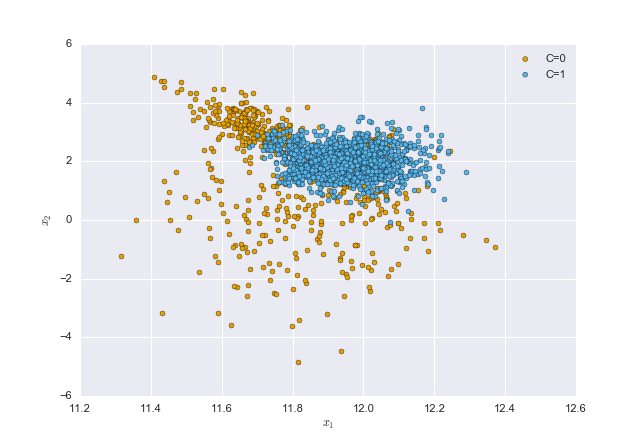

correlation component 0: -0.33
correlation component 1: -0.05


In [53]:
K = 2
pis, mus, covs = EM(X, K=K)
plot_components(X, mus, covs, pis)
show_corrs(covs)

Iteration: 0, likelihood -7961.4086
Iteration: 1, likelihood -7600.7888
Iteration: 2, likelihood -7259.3093
Iteration: 3, likelihood -7102.8826
Iteration: 4, likelihood -7027.2996
Iteration: 5, likelihood -6969.2893
Iteration: 6, likelihood -6912.7176
Iteration: 7, likelihood -6847.7795
Iteration: 8, likelihood -6771.2709
Iteration: 9, likelihood -6695.4105
Iteration: 10, likelihood -6637.3780
Iteration: 11, likelihood -6602.1865
Iteration: 12, likelihood -6580.9969
Iteration: 13, likelihood -6566.9790
Iteration: 14, likelihood -6558.5607
Iteration: 15, likelihood -6554.2250
Iteration: 16, likelihood -6552.2781
Iteration: 17, likelihood -6551.5283
Iteration: 18, likelihood -6551.2676
Iteration: 19, likelihood -6551.1785
Iteration: 20, likelihood -6551.1477
Iteration: 21, likelihood -6551.1368
Iteration: 22, likelihood -6551.1328
3


<IPython.core.display.Javascript object>


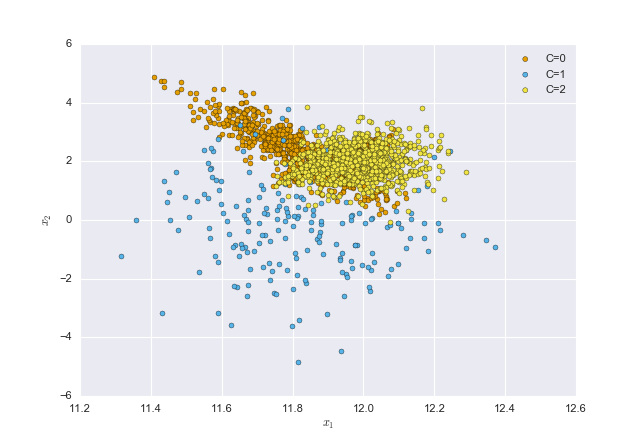

correlation component 0: -0.72
correlation component 1: -0.02
correlation component 2: 0.08


In [54]:
K = 3
pis, mus, covs = EM(X, K=K)
plot_components(X, mus, covs, pis)
show_corrs(covs)

Iteration: 0, likelihood -7824.0444
Iteration: 1, likelihood -7366.0598
Iteration: 2, likelihood -7034.3397
Iteration: 3, likelihood -6815.2740
Iteration: 4, likelihood -6695.2338
Iteration: 5, likelihood -6639.5731
Iteration: 6, likelihood -6610.7268
Iteration: 7, likelihood -6594.0060
Iteration: 8, likelihood -6583.5134
Iteration: 9, likelihood -6576.2067
Iteration: 10, likelihood -6570.6289
Iteration: 11, likelihood -6566.0782
Iteration: 12, likelihood -6562.1890
Iteration: 13, likelihood -6558.7215
Iteration: 14, likelihood -6555.4692
Iteration: 15, likelihood -6552.2371
Iteration: 16, likelihood -6548.8652
Iteration: 17, likelihood -6545.2928
Iteration: 18, likelihood -6541.5997
Iteration: 19, likelihood -6537.9227
Iteration: 20, likelihood -6534.3297
Iteration: 21, likelihood -6530.7925
Iteration: 22, likelihood -6527.2314
Iteration: 23, likelihood -6523.5655
Iteration: 24, likelihood -6519.7585
Iteration: 25, likelihood -6515.8028
Iteration: 26, likelihood -6511.6622
Iteration: 

<IPython.core.display.Javascript object>


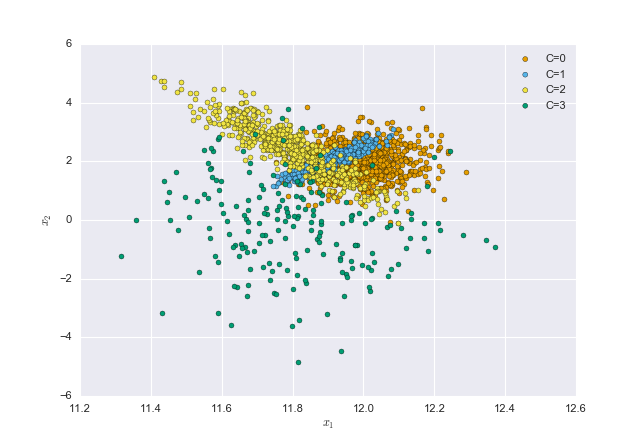

correlation component 0: 0.04
correlation component 1: 0.92
correlation component 2: -0.89
correlation component 3: -0.05


In [55]:
K = 4
pis, mus, covs = EM(X, K=K)
plot_components(X, mus, covs, pis)
show_corrs(covs)

In [57]:
probs = np.zeros((K, N))
for k in range(K):
    probs[k] = pis[k] * multivariate_normal(mus[k], covs[k]).pdf(X)
prediction = np.argmax(probs, axis=0)
    
print((prediction == 1).sum() / N)

0.211


In [61]:
test = np.array([[11.85, 2.2, 0.5, 4.0],
                 [11.95, 3.1, 0.0, 1.0],
                 [12.00, 2.5, 0.0, 2.0],
                 [12.00, 3.0, 1.0, 0.63]])
probs = np.zeros((K, len(test)))
for k in range(K):
    probs[k] = pis[k] * multivariate_normal(mus[k], covs[k]).pdf(test)

print(probs)
print(probs.argmax(axis=0))

[[  1.21639133e-01   1.33850967e-11   8.13833618e-06   2.18484027e-10]
 [  1.04299076e-04   2.66261477e-11   2.48018657e-01   1.12214555e-08]
 [  8.54973411e-02   8.34830969e-07   1.64713076e-05   2.03848846e-09]
 [  1.25148914e-03   7.73969313e-08   4.02318060e-06   2.93464330e-07]]
[0 2 1 3]


In [80]:
print(1.33850967e-11*2.66261477e-11*8.34830969e-07*7.73969313e-08)
print(2.18484027e-10*1.12214555e-08* 2.03848846e-09*2.93464330e-07)

2.3027783777847013e-35
1.4666701792724482e-33


<IPython.core.display.Javascript object>


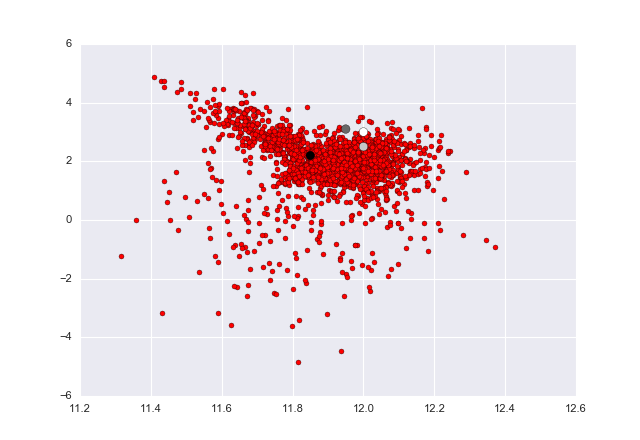

In [85]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='r', s=20.)
plt.scatter(test[:, 0], test[:, 1], c=[1.0, 0.75, 0.5, 0.25], s=60.)
plt.show()

<IPython.core.display.Javascript object>


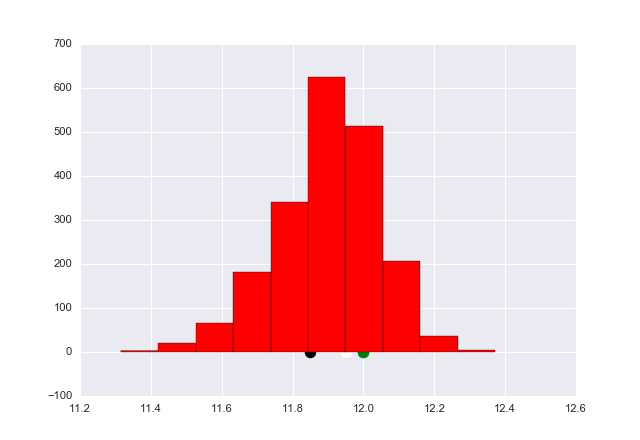

<IPython.core.display.Javascript object>


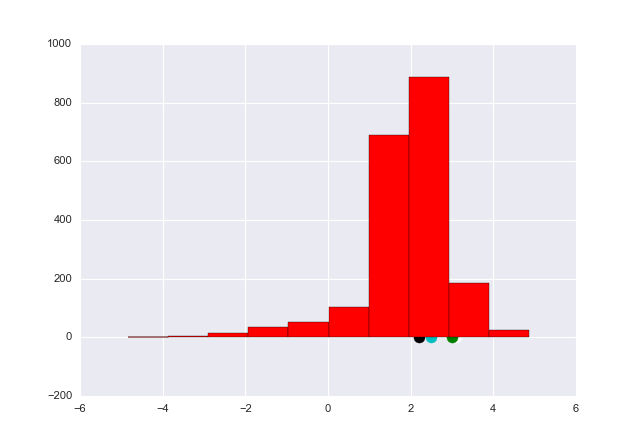

<IPython.core.display.Javascript object>


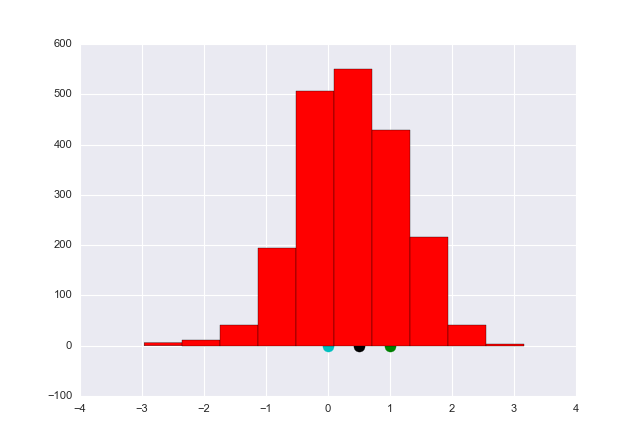

<IPython.core.display.Javascript object>


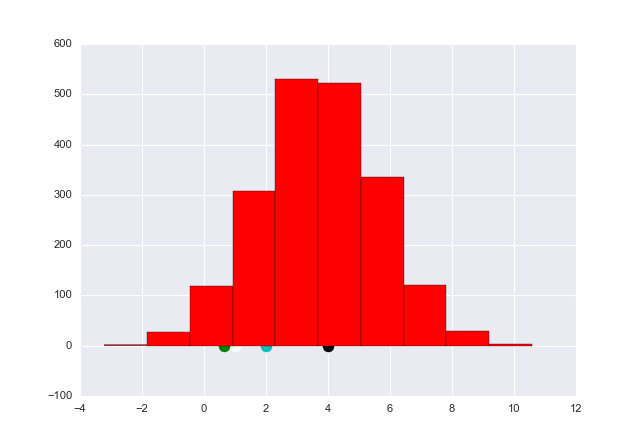

In [79]:
for i in range(D):
    plt.figure()
    plt.hist(X[:, i], color='r')
    for sample, c in zip(test, ['k', 'w', 'c', 'g']):
        plt.scatter(sample[i], 0, color=c, s=100)
    plt.show()